In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns
%matplotlib inline

## data reading

In [20]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## preprocessing & feature engineering

In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [4]:
cust_df=cust_df.rename(columns={'Customer Id':'Id','Years Employed':'Years_Employed','Card Debt':'Card_Debt','Other Debt':'Other_Debt'})


### data visualization

<AxesSubplot:xlabel='DebtIncomeRatio', ylabel='Count'>

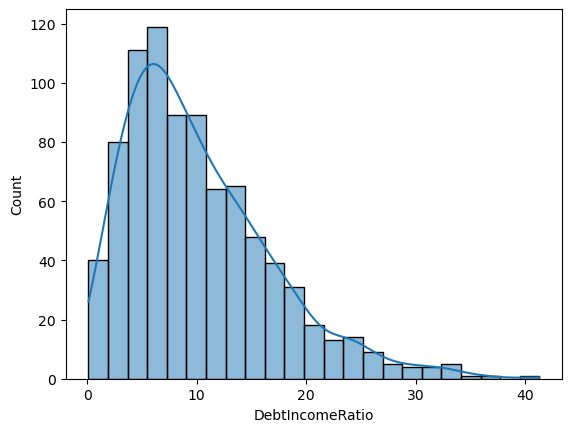

In [5]:
sns.histplot(data=cust_df.DebtIncomeRatio, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

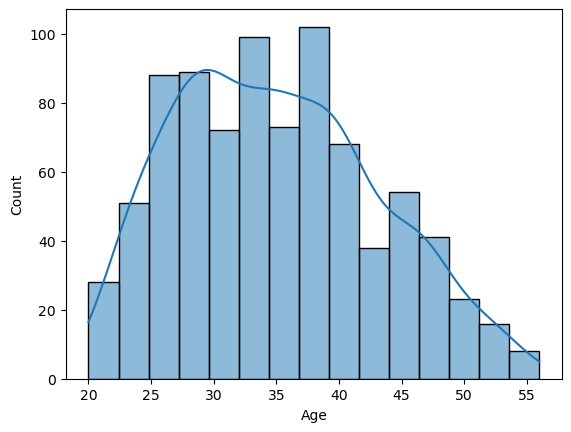

In [6]:
sns.histplot(data=cust_df.Age, kde=True)

<AxesSubplot:xlabel='DebtIncomeRatio', ylabel='Count'>

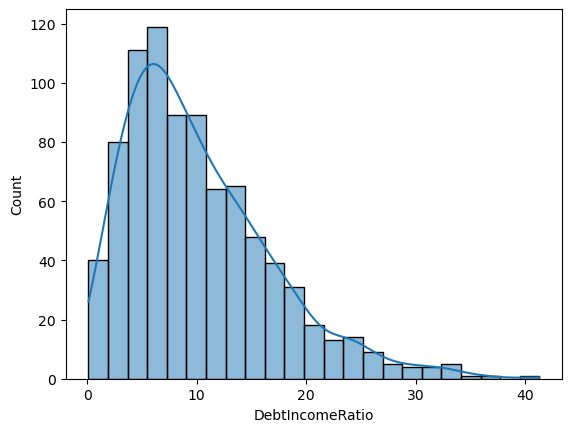

In [7]:
sns.histplot(data=cust_df.DebtIncomeRatio, kde=True)

In [8]:
#Address in this dataset is a categorical variable. The k-means algorithm isn't directly 
#applicable to categorical variables because the Euclidean distance
df = cust_df.drop('Address', axis=1)
df.head()

,Id,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [9]:
cust_df.describe()

,Id,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [10]:
#sinse we have some null value in 'Defaulted' column we will fill them with the most comon value
cust_df['Defaulted'].fillna(cust_df['Defaulted'].mode()[0], inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

## model creation

In [12]:
#modeling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

In [13]:
#store labels in new column in our dataset array
df["Clusters"] = labels
df.head(10)

,Id,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio,Clusters
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
5,6,40,1,23,81,0.998,7.831,NaN,10.9,0
6,7,38,2,4,56,0.442,0.454,0.0,1.6,1
7,8,42,3,0,64,0.279,3.945,0.0,6.6,0
8,9,26,1,5,18,0.575,2.215,NaN,15.5,1
9,10,47,3,23,115,0.653,3.947,0.0,4.0,0


In [14]:
#grouping all data by "clus_km" and calculate the mean of each group
df.groupby('Clusters').mean().drop('Id',axis=1)

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio
Clusters,,,,,,,,
0,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


## insights generating

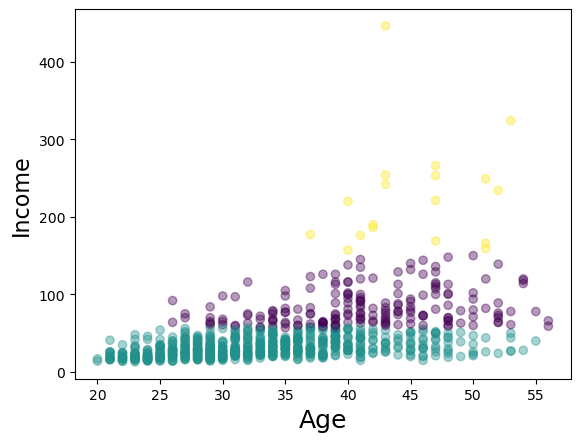

In [15]:

# "c=df.Clusters" specify in wich data the markers color will be base on
plt.scatter(X[:, 0], X[:, 3],  c=df.Clusters, alpha=0.4) 
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

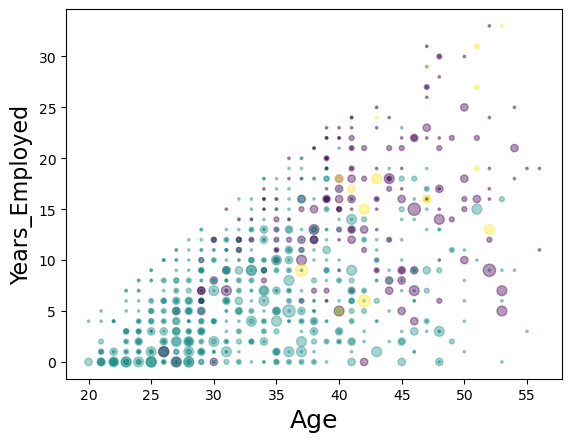

In [16]:
area = np.pi * ( X[:, 1])**2  
# "c=df.Clusters" specify in wich data the markers color will be base on
plt.scatter(X[:, 0], X[:, 2],s=area,  c=df.Clusters, alpha=0.4) 
plt.xlabel('Age', fontsize=18)
plt.ylabel('Years_Employed', fontsize=16)

plt.show()